# What are Target Pixel Files?

Target Pixel Files (TPFs) are a file common to Kepler/K2 and the TESS mission. They contain data that is usually centered around a single star.

TPFs can be thought of as stacks of images, with one image for every timestamp the telescope took data. Each timestamp is referred to as a **cadence**. These images are cut out 'postage stamps' of the full observation to make them easier to work with. 

TPFs are given in FITS files, which you can read more about [here](https://fits.gsfc.nasa.gov/fits_primer.html). `lightkurve` includes tools for you to work directly with these files easily and intuitively.

In this tutorial we'll cover the basics of working with TPFs. In lightcurve there are classes to work with each mission. For example `KeplerTargetPixelFile` is used to work with data from the Kepler (and K2) mission. `TessTargetPixelFile` is used to work with data from the TESS mission.

We'll us a Kepler TPF as an example. First, let's open a file. We can do this easily with the `KeplerTargetPixelFile.from_archive` function. This will retrieve the data from the [MAST data archive](https://archive.stsci.edu/kepler/), which holds all of the Kepler and K2 data.
In this case we are downloading the Target Pixel File with the Kepler ID 6922244 for quarter 4 (Kepler's observations were split into quarters of a year).
You can also download a file with `from_archive` using the name of the target, or using the astronomical coordinates (Right Ascension and Declination, often referred to as "RA" and "Dec").

# O que são arquivos de pixel de destino?

Os arquivos de pixel de destino (TPFs) são um arquivo comum ao Kepler / K2 e à missão TESS. Eles contêm dados que geralmente são centralizados em torno de uma única estrela.

Os TPFs podem ser considerados pilhas de imagens, com uma imagem para cada registro de data e hora que o telescópio coletou dados. Cada registro de data e hora é referido como ** cadência **. Essas imagens são recortadas 'selos postais' da observação completa para facilitar o trabalho.

Os TPFs são fornecidos nos arquivos do FITS, sobre os quais você pode ler mais sobre [aqui] (https://fits.gsfc.nasa.gov/fits_primer.html). O `lightkurve` inclui ferramentas para você trabalhar diretamente com esses arquivos de maneira fácil e intuitiva.

Neste tutorial, abordaremos o básico do trabalho com TPFs. No lightcurve, existem classes para trabalhar com cada missão. Por exemplo, `KeplerTargetPixelFile` é usado para trabalhar com dados da missão Kepler (e K2). O `TessTargetPixelFile` é usado para trabalhar com dados da missão TESS.

Vamos usar um Kepler TPF como exemplo. Primeiro, vamos abrir um arquivo. Podemos fazer isso facilmente com a função `KeplerTargetPixelFile.from_archive`. Isso recuperará os dados do [arquivo de dados MAST] (https://archive.stsci.edu/kepler/), que contém todos os dados do Kepler e K2.
Nesse caso, estamos baixando o Target Pixel File com o Kepler ID 6922244 para o quarto trimestre (as observações do Kepler foram divididas em trimestres de um ano).
Você também pode baixar um arquivo com `from_archive` usando o nome do alvo ou usando as coordenadas astronômicas (Ascensão e declinação retas, geralmente chamadas de" RA "e" Dec ").

In [5]:
from lightkurve import KeplerTargetPixelFile

#tpf = KeplerTargetPixelFile.from_archive(6922244, quarter=4)

In [13]:
from lightkurve import search_targetpixelfile

tpf = search_targetpixelfile(6922244, quarter=4).download(quality_bitmask='hardest')



We can access lots of meta data using this object very simply with properties of the `KeplerTargetPixelFile` object. For example, we can find the mission name, and the quarter that the data was taken in by typing the following:

Podemos acessar muitos metadados usando esse objeto de maneira muito simples, com propriedades do objeto `KeplerTargetPixelFile`. Por exemplo, podemos encontrar o nome da missão e o trimestre em que os dados foram coletados digitando o seguinte:

In [14]:
tpf.mission

'Kepler'

In [15]:
tpf.quarter

4

You can find the full list of properties in the [API documentation](http://lightkurve.keplerscience.org/api/targetpixelfile.html).

The most interesting data in a `KeplerTargetPixelFile` object are the `flux` and `time` values which give access to the brightness of the observed target over time. You can access the timestamps of the observations using the `time` property:

Você pode encontrar a lista completa de propriedades na documentação da API.

Os dados mais interessantes em um objeto `KeplerTargetPixelFile` são os valores` flux` e `time` que dão acesso ao brilho do alvo observado ao longo do tempo. Você pode acessar os registros de data e hora das observações usando a propriedade `time`:

In [16]:
tpf.time

array([352.37632485, 352.45805764, 352.47849084, ..., 442.16263546,
       442.18306983, 442.2035041 ])

By default, `time` is in a Kepler-specific time frame (BKJD) in units of days. You can easily convert this into [AstroPy Time objects](http://docs.astropy.org/en/stable/time/) using the `timeobj` property:

Por padrão, `time` está em um período específico do Kepler (BKJD) em unidades de dias. Você pode facilmente converter isso em [objetos AstroPy Time] (http://docs.astropy.org/en/stable/time/) usando a propriedade `timeobj`:

In [17]:
tpf.timeobj

AttributeError: 'KeplerTargetPixelFile' object has no attribute 'timeobj'

In turn, this gives you access to human-readable ISO timestamps using the `timeobj.iso` property:

Por sua vez, isso fornece acesso a registros de data e hora ISO legíveis por humanos usando a propriedade `timeobj.iso`:


In [18]:
tpf.timeobj.iso

AttributeError: 'KeplerTargetPixelFile' object has no attribute 'timeobj'

Next, let's look at the actual image data, which is available via the `flux` property:

A seguir, vejamos os dados reais da imagem, disponíveis através da propriedade `flux`:

In [7]:
tpf.flux.shape

(4020, 5, 5)

The `flux` data is a 4020x5x5 array in units electrons/second. The first axis is the time axis, and the images themselves are 5 pixels by 5 pixels. You can use the `plot` method on the `KeplerTargetPixelFile` object to view the data. (By default, this will show just one cadence of the data. But you can pass the cadence you want to look at to the `frame` keyword if you would like to check a particular flux point for thruster firings, cosmic rays or asteroids.)

Os dados do `fluxo 'são uma matriz de 4020x5x5 em unidades de elétrons / segundo. O primeiro eixo é o eixo do tempo e as próprias imagens são de 5 por 5 pixels. Você pode usar o método `plot` no objeto` KeplerTargetPixelFile` para visualizar os dados. (Por padrão, isso mostrará apenas uma cadência dos dados. Mas você pode passar a cadência que deseja olhar para a palavra-chave `frame` se desejar verificar um ponto de fluxo específico para disparos de impulsor, raios cósmicos ou asteróides. )

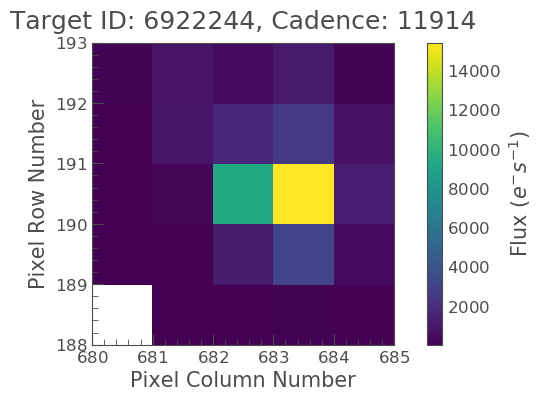

In [19]:
%matplotlib inline
tpf.plot(frame=0);

The values shown in this image are also directly accessible as an array:

Os valores mostrados nesta imagem também são diretamente acessíveis como uma matriz:

In [20]:
tpf.flux[0]

array([[          nan, 5.6079335e+00, 5.1491142e+01, 8.4241745e+01,
        3.0221334e+01],
       [4.4045620e+01, 7.6861229e+01, 1.1227759e+03, 3.2262029e+03,
        4.5486777e+02],
       [2.5911165e+01, 2.2907593e+02, 9.3626543e+03, 2.3606273e+04,
        1.2087750e+03],
       [4.0100830e+01, 8.8543927e+02, 1.7102118e+03, 2.6254871e+03,
        7.0796606e+02],
       [1.5719417e+02, 8.3713440e+02, 5.1021539e+02, 1.1501041e+03,
        1.8313370e+02]], dtype=float32)

You can use normal `numpy` methods on these to find the shape, mean etc!

We can now turn this Target Pixel File into a light curve, with a single flux value for every time value. Each of the pixels are 4 arcseconds ($4"$) across. The point spread function (PSF) of the telescope causes the light from the star fall onto several different pixels, which can be seen in the image above. Because of this spreading, we have to sum up many pixels to collect all the light from the source. To do this we sum up all the pixels in an **aperture**. An aperture is a pixel mask, where we take only the pixels related to the target. 

The *Kepler* pipeline adds an aperture mask to each target pixel file. This aperture determines which pixels are summed to create a 1D light curve of the target. There are some science cases where you might want to create a different aperture. For example, there may be a nearby contaminant or you may want to measure the background. 

The standard pipeline aperture is easily accessed in a `KeplerTargetPixelFile` object using `tpf.pipeline_mask`, which is a boolean array:

## Traduzido


Você pode usar métodos normais `numpy` para encontrar a forma, a média etc!

Agora podemos transformar esse arquivo de pixel de destino em uma curva de luz, com um único valor de fluxo para cada valor de tempo. Cada um dos pixels tem 4 segundos de arco ($ 4 "$) de diâmetro. A função de espalhamento pontual (PSF) do telescópio faz com que a luz da estrela caia em vários pixels diferentes, que podem ser vistos na imagem acima. Devido a essa dispersão, temos que somar muitos pixels para coletar toda a luz da fonte.Para fazer isso, somaremos todos os pixels em uma ** abertura **. Uma abertura é uma máscara de pixel, onde pegamos apenas os pixels relacionados ao alvo .


O pipeline * Kepler * adiciona uma máscara de abertura a cada arquivo de pixel de destino. Essa abertura determina quais pixels são somados para criar uma curva de luz 1D do alvo. Existem alguns casos científicos em que você pode querer criar uma abertura diferente. Por exemplo, pode haver um contaminante próximo ou você pode medir o fundo.

A abertura padrão do pipeline é facilmente acessada em um objeto `KeplerTargetPixelFile` usando` tpf.pipeline_mask`, que é uma matriz booleana:

In [21]:
tpf.pipeline_mask

array([[False, False, False, False, False],
       [False, False,  True,  True, False],
       [False, False,  True,  True, False],
       [False,  True,  True,  True, False],
       [False, False, False,  True, False]])

We can also plot this aperture over the target pixel file above to see if the flux of the star is all contained within the aperture.

Também podemos traçar essa abertura sobre o arquivo de pixels alvo acima para ver se o fluxo da estrela está todo contido na abertura.

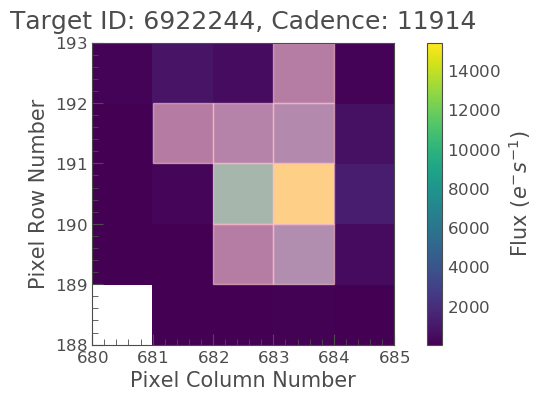

In [22]:
tpf.plot(aperture_mask=tpf.pipeline_mask)

Now that we have the aperture we can create a Simple Aperture Photometry light curve in the next tutorial.

Finally, note that you can inspect all the raw metadata of the target by taking a look at the 'header' of the FITS file, which contains information about the data set. Let's just print the first 10 lines:

Agora que temos a abertura, podemos criar uma curva de luz Simple Aperture Photometry no próximo tutorial.

Por fim, observe que você pode inspecionar todos os metadados brutos do destino, observando o 'cabeçalho' do arquivo FITS, que contém informações sobre o conjunto de dados. Vamos apenas imprimir as 10 primeiras linhas:

In [12]:
tpf.header()[:10]

SIMPLE  =                    T / conforms to FITS standards                     
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T / file contains extensions                       
NEXTEND =                    2 / number of standard extensions                  
EXTNAME = 'PRIMARY '           / name of extension                              
EXTVER  =                    1 / extension version number (not format version)  
ORIGIN  = 'NASA/Ames'          / institution responsible for creating this file 
DATE    = '2015-09-23'         / file creation date.                            
CREATOR = '917482 TargetPixelExporterPipelineModule' / pipeline job and program 

We can look at the values in the second extention of the fits file by passing an extention number to the `header` function. For example, to look at all the column titles:

Podemos observar os valores na segunda extensão do arquivo fits passando um número de extensão para a função `header`. Por exemplo, para examinar todos os títulos da coluna:

In [13]:
tpf.header(1)['TTYPE*']

TTYPE1  = 'TIME    '           / column title: data time stamps                 
TTYPE2  = 'TIMECORR'           / column title: barycenter - timeslice correction
TTYPE3  = 'CADENCENO'          / column title: unique cadence number            
TTYPE4  = 'RAW_CNTS'           / column title: raw pixel counts                 
TTYPE5  = 'FLUX    '           / column title: calibrated pixel flux            
TTYPE6  = 'FLUX_ERR'           / column title: 1-sigma calibrated uncertainty   
TTYPE7  = 'FLUX_BKG'           / column title: calibrated background flux       
TTYPE8  = 'FLUX_BKG_ERR'       / column title: 1-sigma cal. background uncertain
TTYPE9  = 'COSMIC_RAYS'        / column title: cosmic ray detections            
TTYPE10 = 'QUALITY '           / column title: pixel quality flags              
TTYPE11 = 'POS_CORR1'          / column title: column position correction       
TTYPE12 = 'POS_CORR2'          / column title: row position correction          
TTYPE13 = 'RB_LEVEL'        